In [50]:
# importando o dataset
from sklearn.datasets import load_iris
X,y = load_iris( return_X_y =True, as_frame=True)

In [51]:
# Considerando apenas a coluna 'petal width (cm)' e os targets 0 e 1
X = X.loc[y.isin([0,1]), 'petal width (cm)'].values
y = y[y.isin([0,1])].values

In [52]:
# separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

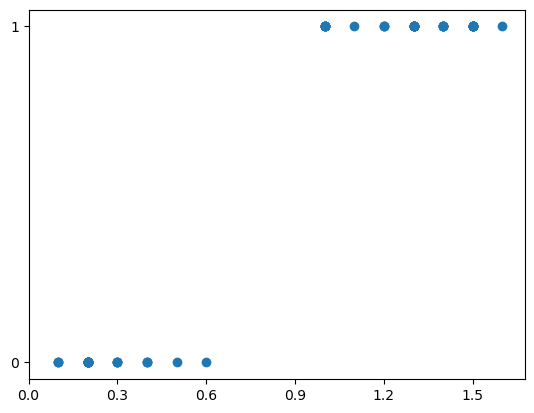

In [53]:
# Visualizando graficamente
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train, y_train)

ax.set(yticks=[0,1], xticks=[0, 0.3, 0.6, 0.9, 1.2, 1.5])

plt.show()

In [54]:
# importando a regressão logística
from sklearn.linear_model import LogisticRegression

In [55]:
# Criando nosso classificador 
clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), y_train)

In [56]:
# verificando o coeficiente angular
w1 = clf.coef_[0][0]

In [57]:
# e o coeficiente linear
w0= clf.intercept_[0]

In [58]:
# importando o expit
from scipy.special import expit

In [59]:
# importando o numpy e criando um array de 0 a 2
import numpy as np
valores_x = np.linspace(X_train.min(), X_train.max(), 100)
#valores_x

In [60]:
# calculando o valor para cada valor de y
valores_y = expit(w1*valores_x+w0)

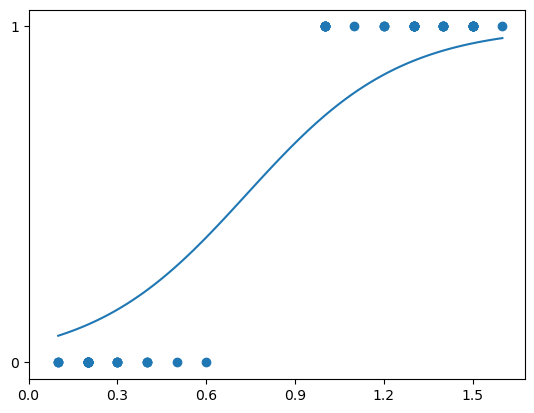

In [61]:
# visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x, valores_y)

ax.set(yticks=[0,1], xticks=[0, 0.3, 0.6, 0.9, 1.2, 1.5])

plt.show()

In [62]:
# podemos exiir os dados de treino em cima dessa curva
y_curva = expit(w1*X_train+w0)

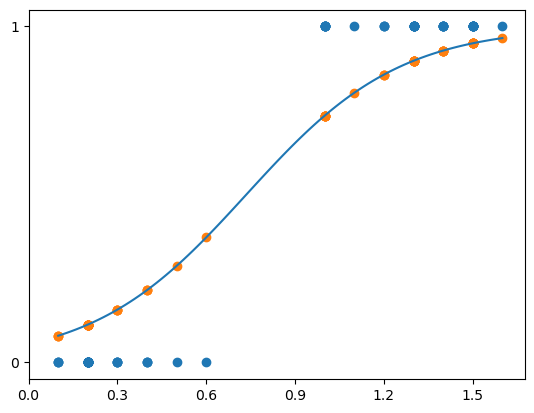

In [63]:
# visualizando graficamente

fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x, valores_y)
ax.scatter(X_train, y_curva)

#ax.axhline(y=0.5, c='m',linestyle='--')

#ax.plot([0.1,0.1], [0,0.07883025],'--g')
#ax.plot([0.2,0.2], [0,0.11156652],'--g')
#ax.plot([0.3,0.3], [0,0.15560101],'--g')
#ax.plot([0.4,0.4], [0,0.21285167],'--g')
#ax.plot([0.5,0.5], [0,0.28408003],'--g')
#ax.plot([0.6,0.6], [0,0.36800066],'--g')
#ax.plot([1,1], [0.72972574,1],'--g')
#ax.plot([1.1,1.1], [0.79846697,1],'--g')
#ax.plot([1.2,1.2], [0.85324086,1],'--g')
#ax.plot([1.3,1.3], [0.89508404,1],'--g')
#ax.plot([1.4,1.4], [0.92303135,1],'--g')
#ax.plot([1.5,1.5], [0.94837655,1],'--g')
#ax.plot([1.6,1.6], [0.96423221,1],'--g')


ax.set(yticks=[0,1], xticks=[0, 0.3, 0.6, 0.9, 1.2, 1.5])

plt.show()

In [64]:
# fazendo a previsão das probabilidades
clf.predict_proba(X_train.reshape(-1,1))[0:5]

array([[0.88722677, 0.11277323],
       [0.26530467, 0.73469533],
       [0.78455262, 0.21544738],
       [0.05000239, 0.94999761],
       [0.07180909, 0.92819091]])

In [65]:
# Verificando o X_train
X_train[0:5]

array([0.2, 1. , 0.4, 1.5, 1.4])

In [66]:
# e o y_train
y_train[0:5]

array([0, 1, 0, 1, 1])

In [67]:
# verificando a previsão da probabilidade 
y_pred = clf.predict_proba(X_test.reshape(-1,1))

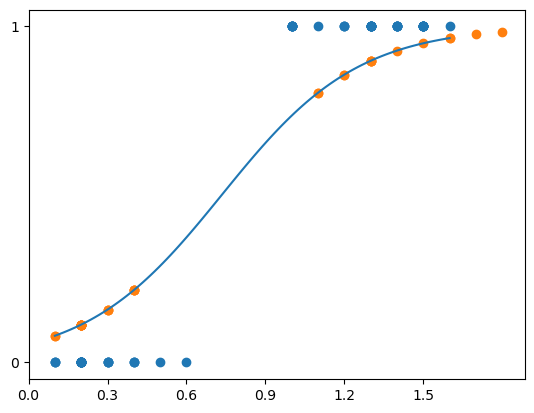

In [68]:
# visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x, valores_y)
ax.scatter(X_test, y_pred[:,1])

ax.set(yticks=[0,1], xticks=[0, 0.3, 0.6, 0.9, 1.2, 1.5])

plt.show()

In [69]:
# e apenas a previsão
y_pred_valor = clf.predict(X_test.reshape(-1,1))

In [71]:
# avaliando o erro
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_valor)

array([[19,  0],
       [ 0, 14]], dtype=int64)

In [72]:
# importando novamente o dataset
X,y = load_iris( return_X_y =True, as_frame=True)

In [73]:
# separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [75]:
# criando novamente o classificador
clf2 = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [77]:
# verificando o coef_
clf2.coef_

array([[-0.38854768,  0.85385236, -2.24493016, -0.95238271],
       [ 0.43789083, -0.3613426 , -0.12373777, -0.77276781],
       [-0.04934314, -0.49250977,  2.36866794,  1.72515053]])

In [79]:
# eo intercept
clf2.intercept_

array([  8.693988  ,   2.12547604, -10.81946404])

In [82]:
# fazendo a previsão das classes
y_pred2 = clf2.predict(X_test)

In [83]:
# avaliando o erro
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)

In [84]:
from sklearn import metrics

In [86]:
metrics.accuracy_score(y_test, y_pred2)

1.0

In [89]:
metrics.precision_score(y_test,y_pred2,average='macro')

1.0

In [90]:
metrics.recall_score(y_test,y_pred2,average='macro')

1.0